# 분류모델 평가

## 01.이진 분류 평가


<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>이름</th>
      <th>설명</th>
      <th>관련 수식</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy (정확도)</td>
      <td>전체 샘플 중에서 올바르게 예측된 샘플의 비율을 나타낸다. 하지만 데이터가 불균형할 경우 유용하지 않을 수 있다.</td>
      <td>$$
      \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
      $$</td>
    </tr>
    <tr>
      <td>Precision (정밀도)</td>
      <td>모델이 Positive로 예측한 샘플 중 실제로 Positive인 샘플의 비율을 나타낸다. FP를 줄이는 데 중점을 둔다.</td>
      <td>$Precision = \frac{TP}{TP + FP}$</td>
    </tr>
    <tr>
      <td>Recall (재현율 또는 민감도)</td>
      <td>실제 Positive 샘플 중 모델이 Positive로 정확히 예측한 샘플의 비율을 나타낸다. FN을 줄이는 데 중점을 둔다.</td>
      <td>$Recall = \frac{TP}{TP + FN}$</td>
    </tr>
    <tr>
      <td>F1-Score (F1 점수)</td>
      <td>Precision과 Recall의 조화 평균을 나타내며, 불균형 데이터에서도 유용하다.</td>
      <td>$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$</td>
    </tr>
    <tr>
      <td>특이도 (Specificity)</td>
      <td>실제 부정인 것 중에서 모델이 부정으로 정확하게 예측한 비율</td>
      <td>$Specificity=\frac{TN}{TN + FP}$</td>
    </tr>
    <tr>
      <td>ROC Curve (수신자 조작 특성 곡선)</td>
      <td>모델의 분류 기준을 변경했을 때, True Positive Rate (Recall)와 False Positive Rate 간의 관계를 시각화한 그래프이다.</td>
      <td>$FPR = \frac{FP}{FP + TN},\ TPR = \frac{TP}{TP + FN}$</td>
    </tr>
    <tr>
      <td>AUC (Area Under Curve)</td>
      <td>ROC Curve 아래 면적을 나타내며, 1에 가까울수록 좋은 성능을 의미한다.</td>
      <td>AUC는 ROC Curve 아래의 면적을 의미</td>
    </tr>
  </tbody>
</table>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 타이타닉 데이터 로드

titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 결측치 체크
titanic_df.info() # Age, Cabin, Embarked 결측치 있음
titanic_df[['Cabin', 'Embarked']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Cabin,Embarked
0,NaN,S
1,C85,C
2,NaN,S
3,C123,S
4,NaN,S
...,...,...
886,NaN,S
887,B42,S
888,NaN,S
889,C148,C


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 전처리 함수
def fillna(df):
    # 결측치 처리 함수
    # df['Age'] = df['Age'].fillna(df['Age'].mean()) # 평균값으로 대체
    num_imputer = SimpleImputer(strategy='mean') # 평균으로 채워라 / SimpleImputer에 커서 올리면 strategy 있음
    df[['Age']] = num_imputer.fit_transform(df[['Age']]) # 데이터프레임 형태와 차원을 유지시키기 위해 대괄호 사용해주어야함

    # 기본값을 지정해주고 싶을 경우 strategy='constant'
    # => mean은 숫자라서 가능한데, 기본값을 바꾸고 싶으면 constant
    # 이 때, 채워넣을 값 : fill_value
    cat_imputer = SimpleImputer(strategy='constant', fill_value='N')
    df[['Cabin']] = cat_imputer.fit_transform(df[['Cabin']])



    # 가장 자주 나오는 값으로 대체 : most_frequent
    freq_imputer = SimpleImputer(strategy = 'most_frequent')
    df[['Embarked']] = freq_imputer.fit_transform(df[['Embarked']])

    return df
    pass

def drop_features(df):
    # 머신러닝 학습에 필요없는 컬럼 제거 함수
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
    pass


sex_encoder = LabelEncoder()
cabin_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

def format_features(df):
    # 인코딩 또는 데이터 포멧을 조정 함수
    # -> 머신러닝에 전달되는 모든 특성은 숫자형이어야 한다.

    # Cabin은 선실영역값을 대체해서 사용
    df["Cabin"] = df['Cabin'].str[:1] # 첫번째 문자만 가져오기
    features = ['Sex', 'Cabin', 'Embarked']
    encoders = [sex_encoder, cabin_encoder, embarked_encoder]

    for i, feat in enumerate(features):
        encoder = encoders[i]
        df[feat] = encoder.fit_transform(df[feat])

    return df

def preprocess_titanic(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [5]:
# 타이타닉 데이터 전처리
# 입력/라벨 분할
y_titanic = titanic_df['Survived']
X_titanic = titanic_df.drop(['Survived'], axis=1)

X_titanic = preprocess_titanic(X_titanic)

X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [6]:
# 학습/테스트 데이터 부리
from sklearn.model_selection import train_test_split
                                                                        # 8:2 비율
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42,
                                                    stratify=y_titanic)

print(X_train.shape, X_test.shape) # 2차원이면 준비 완!
print(y_train.shape, y_test.shape)

(712, 8) (179, 8)
(712,) (179,)


## 정확도 Accuracy
모든 샘플 수 중의 정답 비율 $
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$


데이터가 불균형한 경우(즉, 긍정과 부정 샘플의 수가 크게 다른 경우) 정확도는 비현실적인 성능을 나타낼 수 있다.


불균형 데이터 예시:
만약 실제로 1000개의 데이터 중에서 990개가 부정(Negative)이고 10개만이 긍정(Positive)인 경우라면, 모든 샘플을 부정으로만 예측해도 정확도는 99%입니다.


$ \text { Accuracy }=\frac{990}{1000}=99 \% $


In [7]:
# 모델 학습/평가
from sklearn.linear_model import LogisticRegression # 분류 모델

lr_reg = LogisticRegression(max_iter=10000)
lr_reg.fit(X_train, y_train)

print('학습셋 : ', lr_reg.score(X_train, y_train))
print('평가셋 : ', lr_reg.score(X_test, y_test))

학습셋 :  0.7949438202247191
평가셋 :  0.8044692737430168


In [8]:
cabin_encoder.classes_
sex_encoder.classes_

array(['female', 'male'], dtype=object)

In [9]:
# 성별 생존여부 파악
titanic_df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [10]:
# 성별만으로 생존여부를 판단하는 모델
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyTitanicCalssifier(BaseEstimator):
    def fit(self, X, y):
        # 아무것도 학습하지 않도록 오버라이드
        pass
    def predict(self, X):
        # 입력데이터의 성별컬럼(Sex)의 값에 따라 생존여부 예측
        # - 여성(0)인 경우 : 1 생존 예측
        # - 남성(1)인 경우 : 0 사망예측

        pred = np.zeros((X.shape[0], 1))
        # 모든 데이터를 순회하며 성별 검사
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 0: # 여성인 경우
                    # 위치기반인덱싱
                    pred[i] = 1 # 생존
        return pred

    def score(self, X, y):
        # 정확도 측정
        return accuracy_score(y, self.predict(X))


my_clf = MyTitanicCalssifier()
my_clf.fit(X_train, y_train)

# 평가
print('학습셋 : ', my_clf.score(X_train, y_train))
print('평가셋 : ', my_clf.score(X_test, y_test))


학습셋 :  0.7893258426966292
평가셋 :  0.776536312849162


### 혼동행렬 Confusion Matrix


|               | 예측 값 부정 (Negative) | 예측 값 긍정 (Positive) |
|---------------|------------------------|------------------------|
| 실제 값 부정 (Negative) | True Negative (TN)         | False Positive (FP)        |
| 실제 값 긍정 (Positive) | False Negative (FN)        | True Positive (TP)         |


![](https://d.pr/i/2c98lS+)

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, my_clf.predict(X_test))

# 정답 / 전체샘플 수
(94 + 45)/ (94 + 16 + 24 + 45)

0.776536312849162

In [12]:
# 불균형 데이터 : 사망자 수가 생존자보다 많다.
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# 무조건 사망으로 예측 모델



# 성별만으로 생존여부를 판단하는 모델
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyTitanicCalssifier2(BaseEstimator):
    def fit(self, X, y):
        # 아무것도 학습하지 않도록 오버라이드
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        return pred

    def score(self, X, y):
        # 정확도 측정
        return accuracy_score(y, self.predict(X))


my_clf = MyTitanicCalssifier2()
my_clf.fit(X_train, y_train)

# 평가
print('학습셋 : ', my_clf.score(X_train, y_train))
print('평가셋 : ', my_clf.score(X_test, y_test))


학습셋 :  0.6165730337078652
평가셋 :  0.6145251396648045


In [14]:
# 혼동행렬 확인
confusion_matrix(y_test, my_clf.predict(X_test))

array([[110,   0],
       [ 69,   0]])

In [15]:
# LogisticRegression 혼동행렬 확인
print(confusion_matrix(y_test, lr_reg.predict(X_test)))
# print('Accuracy : ', lr_reg.score(X_test, y_test))
print("Accuracy :", accuracy_score(y_test, lr_reg.predict(X_test)))

[[96 14]
 [21 48]]
Accuracy : 0.8044692737430168


### Precision 정밀도


$정밀도 = \frac{TP}{TP + FP}$


Positive(양성)이라고 예측한 것중에 정답인 확률


- 양성이라고 한것 중에 진짜 정답은 90%야~
- 스팸메일 분류한 것들중은 모두 스팸메일이던데~


**정밀도가 중요한 지표**
음성이 데이터를 양성으로 예측하면 큰일나는 경우
- 스팸메일 분류 (스팸메일이 아닌데, 스팸으로 분류하면 업무상 큰 혼란을 야기한다. 반면, 양성을 음성으로 분류하는 것(스팸메일을 분류하지 못한것)은 상대적으로 피해가 적다.)




- 암이 아닌 사람을 암으로 분류 했을때 큰 문제일까? -> 문제 x 왜냐하면 암이 아니기때문에 죽지 않는다.

In [16]:
from sklearn.metrics import precision_score

# 모두 사망으로 예측해서 정확도 61% 획득한 모델 -> 정밀도 0점
precision_score(y_test, my_clf.predict(X_test))



C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.0

In [17]:
# LogisticRegression 정밀도
precision_score(y_test, lr_reg.predict(X_test))

0.7741935483870968

### Recall 재현율
$재현율 = \frac{TP}{FN + TP}$


실제 Positive(양성)인 대상중에 Positive라고 예측한 확률


- 실제 암환자중에서는 70%를 맞췄네~




**재현율이 중요한 지표**
양성인 데이터를 음성으로 잘못 판단하면 큰일나는 경우.
- 보험/금융사기
- 암진단


In [18]:
from sklearn.metrics import recall_score

recall_score(y_test, my_clf.predict(X_test))

0.0

In [19]:
# LogisticRegression 재현율
recall_score(y_test, lr_reg.predict(X_test))
# 실제 생존 중에는 69%를 맞췄다.

0.6956521739130435

In [86]:
# 이진분류 종합평가함수
from sklearn.metrics import f1_score, roc_auc_score
def evaluate_binary_classification(y_true, y_pred, y_pred_proba=None):
    # y_true : 실제값
    # y_pred : 예측값

    # "{0: .2f}".format(값) : 0번 인자 값을 소수점 둘째 자리까지 표현
    print('혼동행렬: \n', confusion_matrix(y_true, y_pred))
    print("정확도(Accuracy) : {0: .2f}".format(accuracy_score(y_true, y_pred)))
    print("정밀도(Precision) : {0: .2f}".format(precision_score(y_true, y_pred)))
    print("재현율(Recall) : {0: .2f}".format(recall_score(y_true, y_pred)))
    print("F1점수(F1) : {0: .2f}".format(f1_score(y_true, y_pred)))
    if y_pred_proba is not None:
        print("AUC점수(AUC) : {0: .2f}".format(roc_auc_score(y_true, y_pred_proba))) # 확률값을 줘야함


evaluate_binary_classification(y_test, lr_reg.predict(X_test), lr_reg.predict_proba(X_test)[:, 1])

혼동행렬: 
 [[96 14]
 [21 48]]
정확도(Accuracy) :  0.80
정밀도(Precision) :  0.77
재현율(Recall) :  0.70
F1점수(F1) :  0.73
AUC점수(AUC) :  0.85


In [22]:
# 성별만으로 생존여부를 판단하는 모델
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyTitanicCalssifier(BaseEstimator):
    def fit(self, X, y):
        # 아무것도 학습하지 않도록 오버라이드
        pass
    def predict(self, X):
        # 입력데이터의 성별컬럼(Sex)의 값에 따라 생존여부 예측
        # - 여성(0)인 경우 : 1 생존 예측
        # - 남성(1)인 경우 : 0 사망예측

        pred = np.zeros((X.shape[0], 1))
        # 모든 데이터를 순회하며 성별 검사
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 0: # 여성인 경우
                    # 위치기반인덱싱
                    pred[i] = 1 # 생존
        return pred

    def score(self, X, y):
        # 정확도 측정
        return accuracy_score(y, self.predict(X))


my_clf = MyTitanicCalssifier()
my_clf.fit(X_train, y_train)

# 평가
print('학습셋 : ', my_clf.score(X_train, y_train))
print('평가셋 : ', my_clf.score(X_test, y_test))


학습셋 :  0.7893258426966292
평가셋 :  0.776536312849162


In [23]:
evaluate_binary_classification(y_test, my_clf.predict(X_test))

혼동행렬: 
 [[94 16]
 [24 45]]
정확도(Accuracy) :  0.78
정밀도(Precision) :  0.74
재현율(Recall) :  0.65


### Precision/Recall Trade-off
분류 결정 임계치 Confidence Threshold를 조정하면 정밀도와 재현율을 상호 보완할 수 있다.


**Precision/Recall Trade-off 요약**


* **분류 결정 임계치(Threshold)** 를 조정하면 **정밀도(Precision)** 와 **재현율(Recall)** 사이에 균형을 조절할 수 있다.
* **임계치 낮춤** → Positive 예측 증가 → **재현율↑**, **정밀도↓**


  * FN 감소 → Recall 분모 작아짐 → Recall 증가
  * FP 증가 → Precision 분모 커짐 → Precision 감소
* **임계치 높임** → Positive 예측 감소 → **정밀도↑**, **재현율↓**


  * FN 증가 → Recall 분모 커짐 → Recall 감소
  * FP 감소 → Precision 분모 작아짐 → Precision 증가


**상황별 전략**


* **정밀도 100%**: 확실한 경우에만 Positive 예측 → **임계치 높임**
* **재현율 100%**: 모두 Positive로 예측 → **임계치 낮춤**
* **재현율 중시**: 암 진단, 금융 사기 → **임계치 낮춤**
* **정밀도 중시**: 스팸 필터링, 광고 타깃팅 → **임계치 높임**


In [26]:
# 확률값 확인
# -0~1 사이의 확률값을 임계치와 비교해서 큰 경우는 양성예측, 작은 경우는 음성예측
# predict_proba() : 예측 확률
y_pred_proba = lr_reg.predict_proba(X_test)
print(y_pred_proba[:10, 1])

y_pred = lr_reg.predict(X_test)
print(y_pred[:10])

[0.07616019 0.05187284 0.17764936 0.03999728 0.57911247 0.46579626
 0.72381424 0.41124598 0.38964579 0.14423187]
[0 0 0 0 1 0 1 0 0 0]


In [34]:
# Binarizer 클래스를 활용한 임계치 수정
# - threshold 값을 조정
from sklearn.preprocessing import Binarizer

proba = [[1], [-1], [2], [0], [0.5]] # 이런 데이터가 있는 proba가 있다고 가정

binarizer = Binarizer(threshold=1)
pred = binarizer.fit_transform(proba)
print(pred)

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [45]:
# 타이타닉 데이터셋에 임계기준치 수정
from sklearn.preprocessing import Binarizer

# 양성일 확률값만 가져와서 2차원으로 변경
y_pred_proba = lr_reg.predict_proba(X_test)[:, 1].reshape(-1, 1) # 확률값 가져오고싶을 때
print(y_pred_proba[:5])

# 직접 설정한 임계치 기준으로 예측
threshold = 0.8

binarizer = Binarizer(threshold=threshold) # 0.6이 들어감
y_pred = binarizer.fit_transform(y_pred_proba) # 확률 계산해서 적용
print(y_pred[:5]) # 0.6으로 높였더니 다 죽었다고 판단해서 0이 나옴

evaluate_binary_classification(y_test, y_pred)
# 임계치를 높이면 정밀도가 올라가고 재현율이 떨어짐
# 임계치를 낮추면 재현율이 떨어지고 정밀도가 올라감





[[0.07616019]
 [0.05187284]
 [0.17764936]
 [0.03999728]
 [0.57911247]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
혼동행렬: 
 [[108   2]
 [ 49  20]]
정확도(Accuracy) :  0.72
정밀도(Precision) :  0.91
재현율(Recall) :  0.29


In [60]:
# 여러 개의 임계치 비교
threshold = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in threshold:
    binarizer = Binarizer(threshold=threshold)
    y_pred = binarizer.fit_transform(y_pred_proba)
    print(f'\n === threshold : {threshold} ===')
    evaluate_binary_classification(y_test, y_pred)




 === threshold : 0.3 ===
혼동행렬: 
 [[82 28]
 [12 57]]
정확도(Accuracy) :  0.78
정밀도(Precision) :  0.67
재현율(Recall) :  0.83

 === threshold : 0.4 ===
혼동행렬: 
 [[89 21]
 [16 53]]
정확도(Accuracy) :  0.79
정밀도(Precision) :  0.72
재현율(Recall) :  0.77

 === threshold : 0.5 ===
혼동행렬: 
 [[96 14]
 [21 48]]
정확도(Accuracy) :  0.80
정밀도(Precision) :  0.77
재현율(Recall) :  0.70

 === threshold : 0.6 ===
혼동행렬: 
 [[103   7]
 [ 26  43]]
정확도(Accuracy) :  0.82
정밀도(Precision) :  0.86
재현율(Recall) :  0.62

 === threshold : 0.7 ===
혼동행렬: 
 [[107   3]
 [ 38  31]]
정확도(Accuracy) :  0.77
정밀도(Precision) :  0.91
재현율(Recall) :  0.45


In [52]:
# 시각화
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

print(precisions.shape) # thresholds수 + 1 : 마지막에 1
print(recalls.shape) # thresholds수 + 1 : 마지막에 0
print(thresholds.shape)


print(precisions[-10:]) # 뒤에서부터 10개 이후로 끝까지
print(recalls[-10:]) #
print(thresholds[-10:])

(168,)
(168,)
(167,)
[0.88888889 0.875      0.85714286 0.83333333 0.8        0.75
 0.66666667 0.5        1.         1.        ]
[0.11594203 0.10144928 0.08695652 0.07246377 0.05797101 0.04347826
 0.02898551 0.01449275 0.01449275 0.        ]
[0.91251884 0.91434639 0.9165218  0.94212338 0.95477134 0.95739231
 0.95865394 0.9694979  0.97161113 0.97187772]


In [56]:
# thresholds 개수
# - 고유한 확률값 개수
print(y_pred_proba.shape)
print(len(np.unique(y_pred_proba))) # unique한 확률값만 줘서 167개가 나옴!


(179, 1)
167


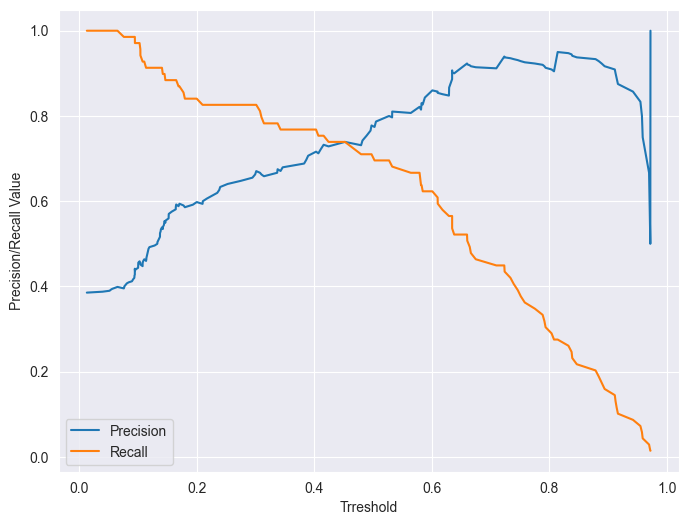

In [59]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')

plt.xlabel('Trreshold')
plt.ylabel('Precision/Recall Value')
plt.legend()
plt.show()

### F1 Score


정확도는 불균형한 데이터에서 신뢰하기 어렵기 때문에, 정밀도(Precision)와 재현율(Recall)이 보완 지표로 사용된다. 하지만 이 두 지표에도 각각의 맹점이 존재한다.


**정밀도를 100%로 만드는 방법**
정밀도는 $ \text{Precision} = \frac{TP}{TP + FP} $ 로 정의된다. 확실한 경우에만 Positive로 예측하고 나머지는 모두 Negative로 예측하면, 정밀도를 100%로 만들 수 있다. 예를 들어, 전체 환자가 1000명인데 그 중에서 확실히 양성이라고 판단되는 환자가 단 1명이라고 가정한다. 이 1명만 Positive로 예측하고 나머지를 모두 Negative로 예측하면 FP는 0이고 TP는 1이 되며, 정밀도는 $ \frac{1}{1+0} = 1.0 $ 이 되어 100%가 된다.


**재현율을 100%로 만드는 방법**
재현율은 $ \text{Recall} = \frac{TP}{TP + FN} $ 으로 정의된다. 모든 환자를 Positive로 예측하면 재현율은 100%가 된다. 예를 들어, 전체 환자 1000명을 모두 Positive로 예측하면 FN은 0이 되며, 실제 양성자가 30명이라고 해도 재현율은 $ \frac{30}{30+0} = 1.0 $ 이 된다.


**F1 Score의 개념**
F1 스코어는 정밀도와 재현율의 조화를 고려한 지표이다. 이 스코어는 두 값이 어느 한쪽으로 치우치지 않을 때 높은 값을 가진다. F1 스코어는 다음과 같은 공식으로 계산한다:


$$
F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 \cdot \frac{precision \cdot recall}{precision + recall}
$$


예를 들어, A 모델은 정밀도가 0.9이고 재현율이 0.1이라면, F1 스코어는 약 0.18이 된다. 반면, B 모델은 정밀도와 재현율이 각각 0.5로 균형이 맞는 경우이며, 이때 F1 스코어는 0.5로 계산된다. 이처럼 정밀도와 재현율 중 한쪽이 지나치게 낮으면 F1 점수도 낮아진다. 따라서 A 모델보다 B 모델이 더 우수한 성능을 가진다고 볼 수 있다.


**F1 Score는 F-Score의 특수한 경우이며, 베타(β) 값이 1일 때를 의미한다.**
베타 값은 재현율의 중요도를 조절하는 요소로, 보통 2 또는 0.5가 사용된다. 베타가 2이면 재현율에 더 가중치를 두며, 0.5이면 정밀도에 더 가중치를 둔다.


Fβ 점수의 일반적인 공식은 다음과 같다:


$$
F_{\beta}=\left(1+\beta^{2}\right) \cdot \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}
$$


또는 TP, FN, FP를 이용한 식은 다음과 같다:


$$
F_{\beta}=\frac{(1+\beta^{2}) \cdot TP}{(1+\beta^{2}) \cdot TP + \beta^{2} \cdot FN + FP}
$$


이와 같은 방식으로 F-Score는 평가 목적에 따라 정밀도와 재현율의 중요도를 다르게 조절할 수 있다.


In [62]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6019417475728155

### ROC Curve & AUC




#### ROC Curve (수신자 조작 특성 곡선)


ROC 곡선은 다양한 임계값에서의 분류 모델 성능을 시각화한 그래프이다.
이 곡선은 x축에 **False Positive Rate (FPR)**, y축에 \*\*True Positive Rate (TPR, 재현율)\*\*을 나타낸다.


* **FPR**은 실제로는 음성인 데이터를 양성으로 잘못 예측한 비율이다.
  예를 들어, 암이 아닌 사람을 암이라고 예측하거나, 일반 메일을 스팸으로 잘못 분류하는 경우이다.
  FPR은 다음 수식으로 계산한다:
  \$FPR = \frac{FP}{FP + TN}\$


* **TPR**은 실제로 양성인 데이터 중에서 올바르게 양성으로 예측한 비율이다.
  예를 들어, 암 환자를 정확히 암이라고 진단하거나, 스팸 메일을 올바르게 스팸으로 예측한 경우이다.
  TPR은 재현율(recall)이라고도 하며, 다음 수식으로 계산한다:
  \$TPR = \frac{TP}{TP + FN}\$


ROC 곡선은 임계값(threshold)에 따라 FPR과 TPR이 어떻게 변화하는지를 보여준다.
임계값을 조정하면 TPR과 FPR의 값도 함께 바뀌며, 이를 통해 모델의 성능을 전체적으로 파악할 수 있다.


* 임계값이 **0**일 경우, 모든 데이터를 Positive로 예측하게 된다.
  이때 TN은 0이 되고, \$FPR = \frac{FP}{FP + 0} = 1\$이 된다. 재현율도 1이 된다.


* 임계값이 **1**일 경우, 모든 데이터를 Negative로 예측하게 된다.
  이때 FP는 0이 되고, \$FPR = \frac{0}{0 + TN} = 0\$이 된다. 재현율도 0이 된다.


#### AUC (Area Under the Curve)


AUC는 ROC 곡선 아래의 면적을 의미하며, 모델의 분류 성능을 하나의 수치로 요약한 지표이다.
AUC 값은 **0.0에서 1.0 사이**의 값을 가지며, 높을수록 모델의 성능이 우수함을 의미한다.


* AUC = **1.0**: 모든 예측이 완벽한 모델이다.
* AUC = **0.5**: 무작위로 예측하는 모델과 동일하며, 아무런 분류 능력이 없는 경우이다.
* AUC = **0.0**: 예측이 모두 반대로 된 최악의 모델이다.


AUC 값이 클수록 TPR은 높고 FPR은 낮다는 의미이므로, 분류 성능이 우수하다고 판단할 수 있다.


In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

# 샘플데이터
y_pred = [0.1, 0.4, 0.35, 0.8] #모델이 예측한 '양성일 확률'
y_true = [0,0,1,1] # 실제 정답(0=음성, 1=양성)

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
# tpr: 실제 양성중에 얼마나 잘맞췄니
# fpr: 실제 음성중에 얼마나 못맞췄니
print('fpr :', fpr)
print('tpr :', tpr)
print('thresholds :', thresholds)
# 내림차순
# inf :무한대 -> 양의 무한 수

"""
thresholds (문턱)
--------------------------
inf : 양성이 없는 경우 (문턱이 무한이면 아무도 통과 못 함)
0.8 : (0.8보다 크거나 같으면 양성)
0.4 : 2개 양성 예측
0.35 : 3개 양성 예측
0.1 : 4개 양성 예측

"""


fpr : [0.  0.  0.5 0.5 1. ]
tpr : [0.  0.5 0.5 1.  1. ]
thresholds : [ inf 0.8  0.4  0.35 0.1 ]


'\nthresholds (문턱)\n--------------------------\ninf : 양성이 없는 경우 (문턱이 무한이면 아무도 통과 못 함)\n0.8 : (0.8보다 크거나 같으면 양성)\n0.4 : 2개 양성 예측\n0.35 : 3개 양성 예측\n0.1 : 4개 양성 예측\n\n'

In [68]:
# 양의 무한수 / 음의 무한수
np.inf, -np.inf

(inf, -inf)

In [94]:
# 타이타닉 데이터 적용
y_pred_proba = lr_reg.predict_proba(X_test)[:, 1] # X_test에서 양성으로 예측한 것만 확인
fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba) # roc_curve가 내부에서 자동으로 TP/FP/FN/TN의 결과가 변하지 않는 unique한 값을추려낸다.

print(fprs.shape)
print(tprs.shape)
print(thresholds.shape)

pd.DataFrame([fprs, tprs, thresholds], index=['fpr', 'tpr', 'threshold'])

(60,)
(60,)
(60,)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
fpr,0.0,0.000000,0.009091,0.009091,0.018182,0.018182,0.027273,0.027273,0.036364,0.036364,...,0.718182,0.781818,0.781818,0.800000,0.827273,0.900000,0.918182,0.945455,0.945455,1.000000
tpr,0.0,0.014493,0.014493,0.275362,0.275362,0.449275,0.449275,0.521739,0.521739,0.536232,...,0.971014,0.971014,0.985507,0.985507,0.985507,0.985507,0.985507,0.985507,1.000000,1.000000
threshold,inf,0.971878,0.971611,0.814030,0.807805,0.723254,0.709745,0.659850,0.638039,0.634548,...,0.102897,0.095030,0.094872,0.094865,0.094848,0.081292,0.078400,0.076160,0.065353,0.013221


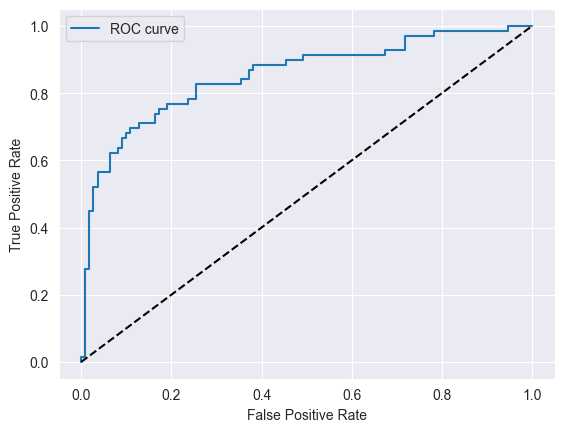

In [75]:
# 시각화
fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fprs, tprs, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--') # 점선으로

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [77]:
# AUC Score(roc curve 아래 넓이값, 최대값 1)
# (Area Under the Curve)
roc_auc_score(y_test, y_pred_proba)


0.8528326745718049

In [100]:
# 유방암 진단 이진분류
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.data.shape)
print(breast_cancer.target) # 569개
print(breast_cancer.feature_names) # 유방암진단 데이터 30개
print(breast_cancer.target_names) # ['malignant' 'benign'] : 악성 (암), 양성(암이 아님)


(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

In [102]:
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [111]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
                        breast_cancer.data, breast_cancer.target,
                        test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 보니까 값의 범위차이가 너무 크다! 스케일링 해야함
# 분류 모델(악성인지 양성인지 알기 위해서)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 평가
evaluate_binary_classification(y_train, model.predict(X_train),
                               model.predict_proba(X_train)[:, 1])

evaluate_binary_classification(y_test, model.predict(X_test),
                               model.predict_proba(X_test)[:, 1])

# -> 3번째 인자로 양성일 때 확률을 전달해야한다.

(455, 30) (114, 30) (455,) (114,)
혼동행렬: 
 [[158  11]
 [  6 280]]
정확도(Accuracy) :  0.96
정밀도(Precision) :  0.96
재현율(Recall) :  0.98
F1점수(F1) :  0.97
AUC점수(AUC) :  0.99
혼동행렬: 
 [[39  4]
 [ 1 70]]
정확도(Accuracy) :  0.96
정밀도(Precision) :  0.95
재현율(Recall) :  0.99
F1점수(F1) :  0.97
AUC점수(AUC) :  1.00


In [115]:
################### 스케일링 버전 ###################
from sklearn.preprocessing import MinMaxScaler

# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                    breast_cancer.target,
                                                    test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 학습 전에 스케일링
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test) # fit은 한 번만

# 보니까 값의 범위차이가 너무 크다! 스케일링 해야함
# 분류 모델(악성인지 양성인지 알기 위해서)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 평가
evaluate_binary_classification(y_train, model.predict(X_train),
                               model.predict_proba(X_train)[:, 1])

print('-' * 30)

# 테스트 셋으로 확인
evaluate_binary_classification(y_test, model.predict(X_test),
                               model.predict_proba(X_test)[:, 1])

(455, 30)
(114, 30)
(455,)
(114,)
혼동행렬: 
 [[156  13]
 [  1 285]]
정확도(Accuracy) :  0.97
정밀도(Precision) :  0.96
재현율(Recall) :  1.00
F1점수(F1) :  0.98
AUC점수(AUC) :  0.99
------------------------------
혼동행렬: 
 [[41  2]
 [ 0 71]]
정확도(Accuracy) :  0.98
정밀도(Precision) :  0.97
재현율(Recall) :  1.00
F1점수(F1) :  0.99
AUC점수(AUC) :  1.00
